In [ ]:
!pip install pandas-datareader
!pip install yfinance
!pip install finance-datareader

In [ ]:
import seaborn as sns
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

import yfinance as yf
import pandas_datareader as pdr 
import FinanceDataReader as fdr 

In [ ]:
end = datetime.today()
start = datetime(2000,1,1)

kospi = yf.download('^KS11',start,end) 
ss = yf.download('005930.KS',start,end) 
hm = yf.download('005380.KS',start,end) 

snp = yf.download('^GSPC',start,end) 
nikkei = yf.download('^N225',start,end) 
euronext = yf.download('^N100',start,end) 
vix = yf.download('^VIX',start,end) # VIX

ss_fdr = fdr.DataReader('005930', start, end)
hm_fdr = fdr.DataReader('005380', start, end) 
snp_fdr = fdr.DataReader('US500', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
ss_fdr.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-01-04,6000,6110,5660,6110,1483967,0.148496
2000-01-05,5800,6060,5520,5580,1493604,-0.086743
2000-01-06,5750,5780,5580,5620,1087810,0.007168
2000-01-07,5560,5670,5360,5540,806195,-0.014235
2000-01-10,5600,5770,5580,5770,937615,0.041516


In [ ]:
ss.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4537.110840,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,4143.545898,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,4173.250488,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,4113.844238,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,4284.636719,46880000


In [ ]:
ss.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-17,65900.0,65900.0,64800.0,65000.0,65000.0,10745504
2023-05-18,66000.0,66200.0,65700.0,66200.0,66200.0,14431704
2023-05-19,67800.0,68400.0,67500.0,68400.0,68400.0,20349345
2023-05-22,68400.0,69000.0,68000.0,68500.0,68500.0,14470308
2023-05-23,68500.0,68700.0,68100.0,68400.0,68400.0,8561643


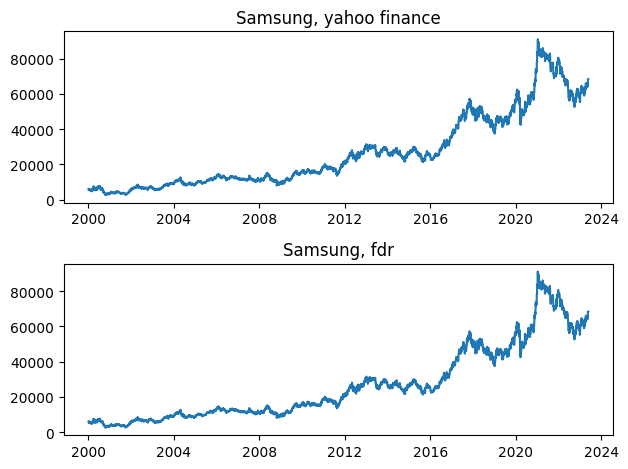

In [ ]:
plt.subplot(211)
plt.plot(ss['Close'])
plt.title('Samsung, yahoo finance')

plt.subplot(212)
plt.plot(ss_fdr['Close'])
plt.title('Samsung, fdr')

plt.tight_layout()
plt.show()

In [ ]:
df = pd.DataFrame({
    'c_ss_y': ss['Close'],
    'c_ss_f': ss_fdr['Close']
}).dropna()

df['result'] = df['c_ss_y'] != df['c_ss_f']

print(df.loc[df['result'] == 'True',:])

Empty DataFrame
Columns: [c_ss_y, c_ss_f, result]
Index: []


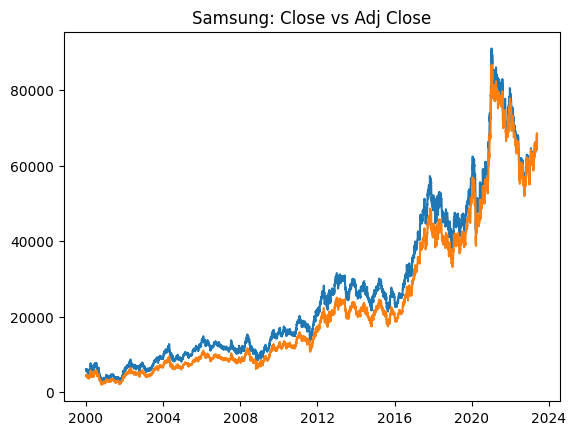

In [ ]:
plt.title("Samsung: Close vs Adj Close")
plt.plot(ss['Close'])
plt.plot(ss['Adj Close'])
plt.show()

In [ ]:
st = pd.DataFrame({
    'SP500': snp['Adj Close'],
    'KOSPI': kospi['Adj Close'],
    'ss': ss['Adj Close'],
    'hm': hm['Adj Close'],
    'nikkei': nikkei['Adj Close'],
    'euronext': euronext['Adj Close'],
    'VIX': vix['Adj Close']
}).dropna()

st.head() 

,SP500,KOSPI,ss,hm,nikkei,euronext,VIX
Date,,,,,,,
2000-01-04,1399.420044,1059.040039,4537.110840,12450.992188,19002.859375,955.969971,27.010000
2000-01-05,1402.109985,986.309998,4143.545898,12511.144531,18542.550781,930.260010,26.410000
2000-01-06,1403.449951,960.789978,4173.250488,11849.496094,18168.269531,922.460022,25.730000
2000-01-07,1441.469971,948.650024,4113.844238,12210.394531,18193.410156,943.880005,21.719999
2000-01-11,1438.560059,981.330017,4284.636719,12029.942383,18850.919922,954.059998,22.500000


In [ ]:
rt= ( np.log(st) - np.log(st.shift(1)) )*100
rt.columns=['r_sp','r_kp','r_ss' ,'r_hm','r_nk','r_ux','r_vx']
rt.head()

,r_sp,r_kp,r_ss,r_hm,r_nk,r_ux,r_vx
Date,,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-9.073851,0.481950,-2.452133,-2.726237,-2.246446
2000-01-06,0.095522,-2.621486,0.714331,-5.433447,-2.039149,-0.842009,-2.608511
2000-01-07,2.672995,-1.271589,-1.433730,3.000226,0.138281,2.295501,-16.942415
2000-01-11,-0.202075,3.386886,4.067784,-1.488886,3.550227,1.072752,3.528185


In [ ]:
df = pd.merge(st,rt,left_index=True, right_index=True, how='inner')
df.head()

,SP500,KOSPI,ss,hm,nikkei,euronext,VIX,r_sp,r_kp,r_ss,r_hm,r_nk,r_ux,r_vx
Date,,,,,,,,,,,,,,
2000-01-04,1399.420044,1059.040039,4537.110840,12450.992188,19002.859375,955.969971,27.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,1402.109985,986.309998,4143.545898,12511.144531,18542.550781,930.260010,26.410000,0.192034,-7.114745,-9.073851,0.481950,-2.452133,-2.726237,-2.246446
2000-01-06,1403.449951,960.789978,4173.250488,11849.496094,18168.269531,922.460022,25.730000,0.095522,-2.621486,0.714331,-5.433447,-2.039149,-0.842009,-2.608511
2000-01-07,1441.469971,948.650024,4113.844238,12210.394531,18193.410156,943.880005,21.719999,2.672995,-1.271589,-1.433730,3.000226,0.138281,2.295501,-16.942415
2000-01-11,1438.560059,981.330017,4284.636719,12029.942383,18850.919922,954.059998,22.500000,-0.202075,3.386886,4.067784,-1.488886,3.550227,1.072752,3.528185


In [ ]:
r1_ksp = st['KOSPI'].pct_change()*100 

r2_ksp = ( np.log(st.KOSPI) - np.log(st.KOSPI.shift(1)))*100

r_eg=pd.concat([r1_ksp, r2_ksp], axis=1)
r_eg.columns = ['r1_ksp', 'r2_ksp']
r_eg.head()

,r1_ksp,r2_ksp
Date,,
2000-01-04,NaN,NaN
2000-01-05,-6.867544,-7.114745
2000-01-06,-2.587424,-2.621486
2000-01-07,-1.263539,-1.271589
2000-01-11,3.444895,3.386886


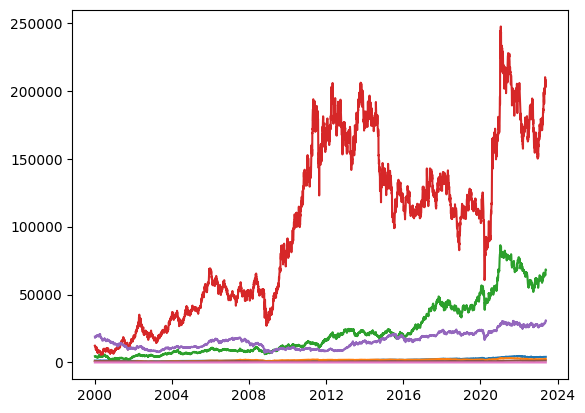

In [ ]:
plt.plot(st)

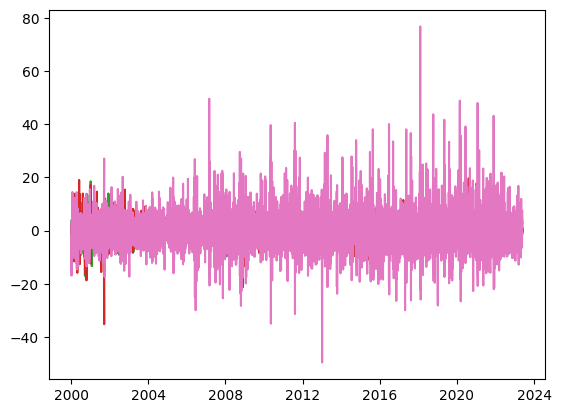

In [ ]:
plt.plot(rt)

<Axes: xlabel='Date'>

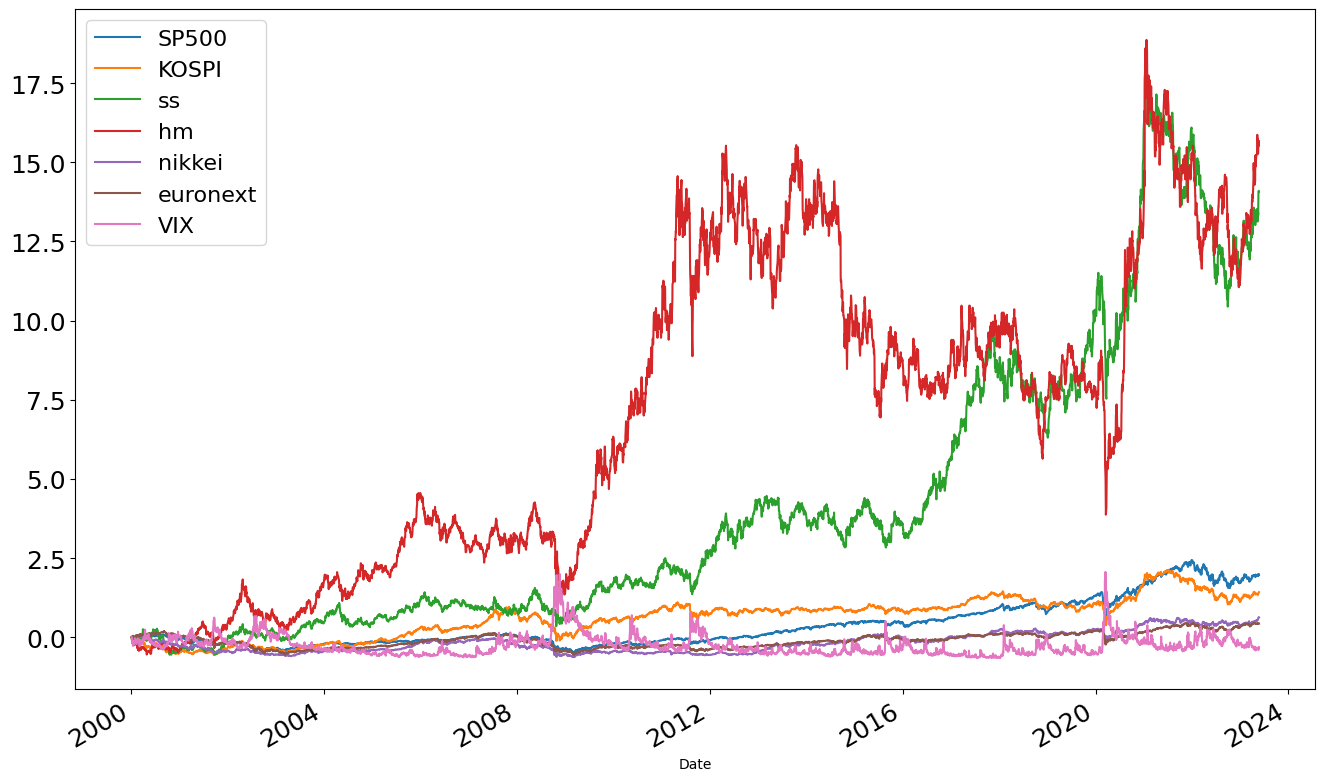

In [ ]:
st_0 = st / st.iloc[0] - 1.0 

plt.rcParams['legend.fontsize'] = 16
st_0.plot( figsize=(16,10), fontsize=18)

<Axes: xlabel='Date'>

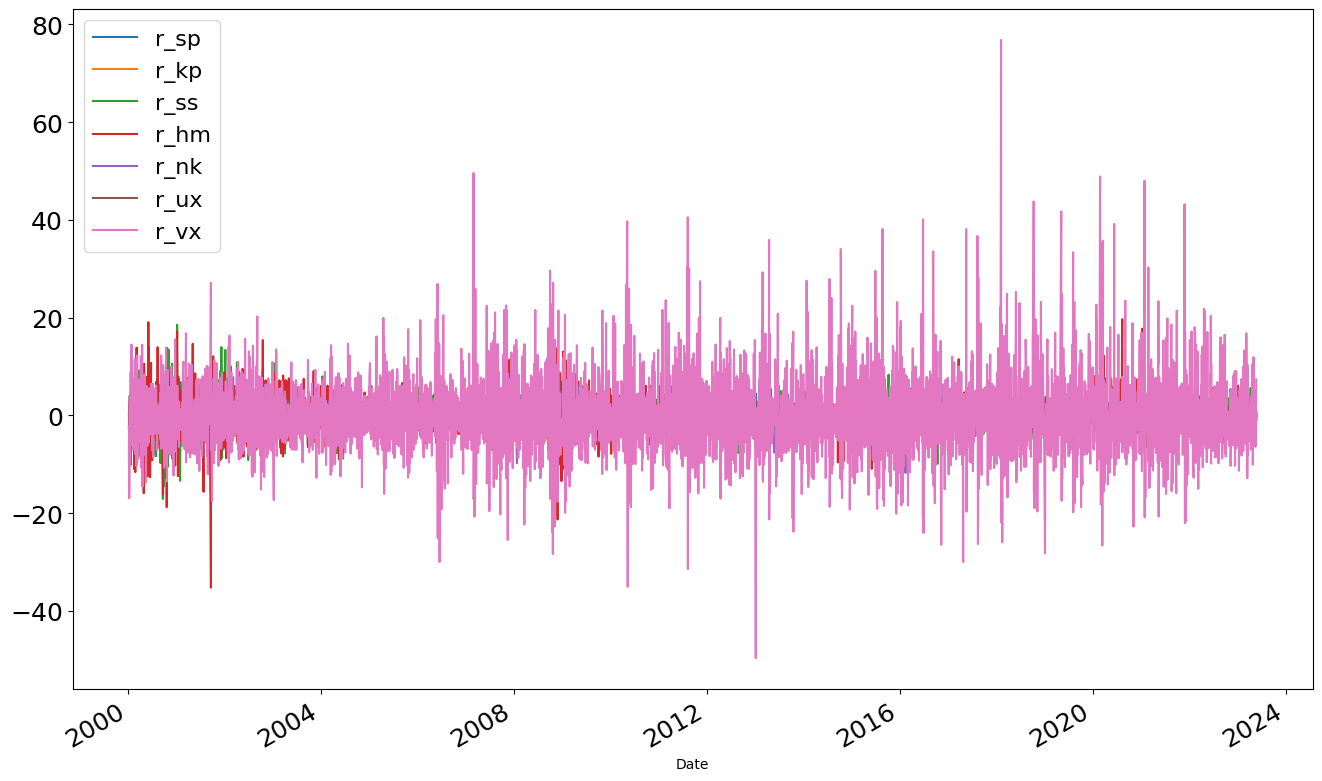

In [ ]:
rt.plot( figsize=(16,10), fontsize=18)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

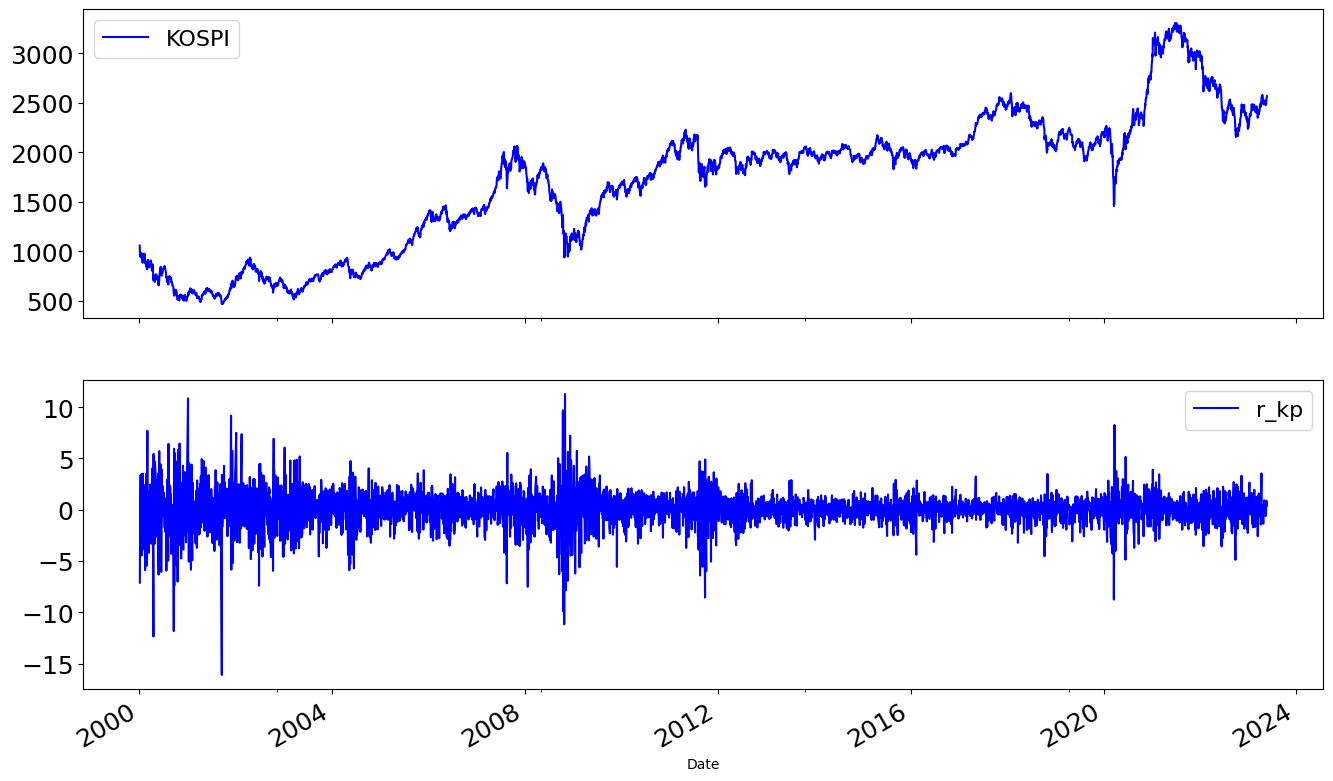

In [ ]:
plt.rcParams['legend.fontsize'] = 16
df[['KOSPI','r_kp']].plot(subplots=True, style='b', figsize=(16,10), fontsize=18 )

Text(0.5, 1.0, 'KOSPI Return')

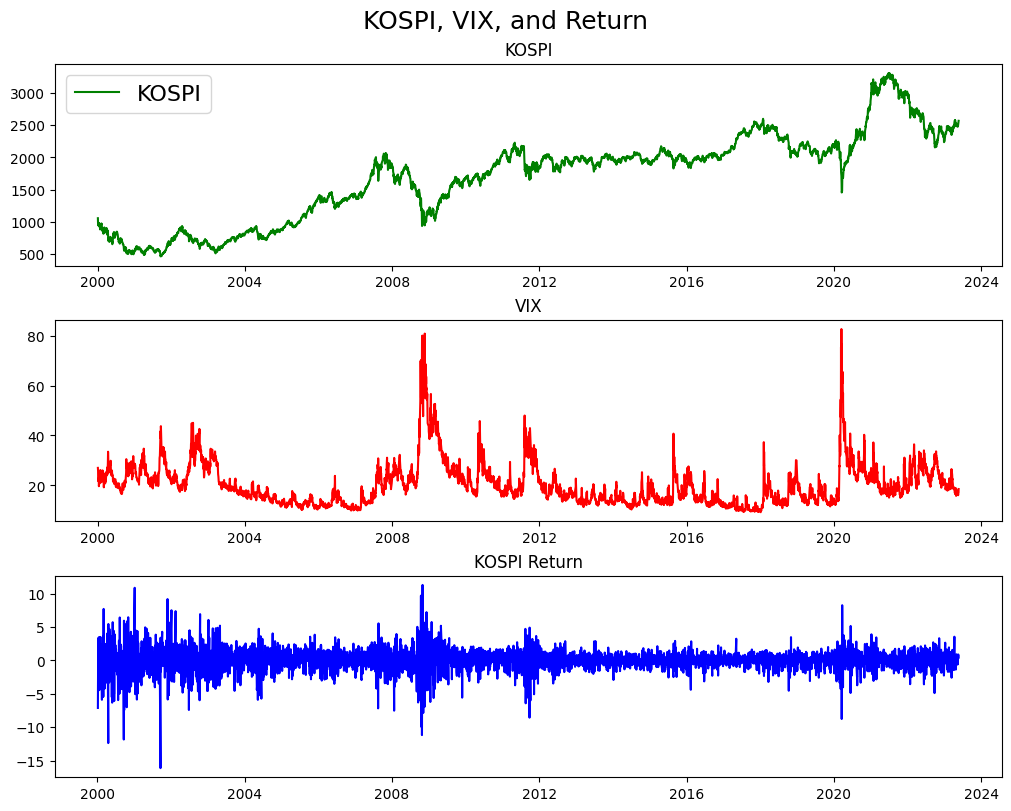

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10,8), constrained_layout=True)
fig.suptitle('KOSPI, VIX, and Return', fontsize=18)

axs[0].plot(df.index, df['KOSPI'], 'g-', label='KOSPI')

axs[0].set_title('KOSPI')
axs[0].legend(['KOSPI'])

axs[1].plot(df.index, df['VIX'], 'r-')
axs[1].set_title('VIX')

axs[2].plot(df.index, df['r_kp'], 'b-')
axs[2].set_title('KOSPI Return')

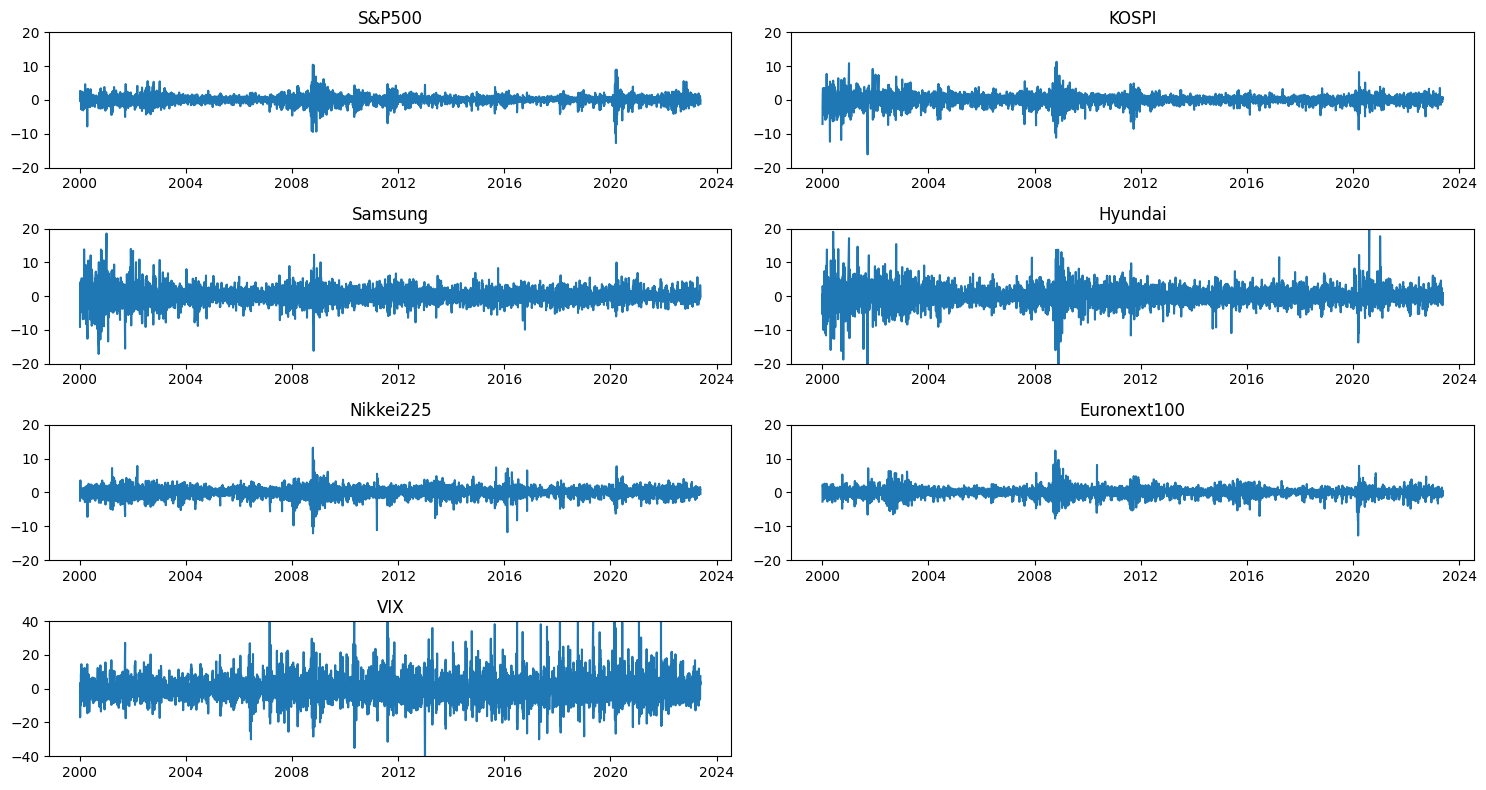

In [ ]:
fig = plt.figure(figsize=(15,8))

plt.subplot(421)
plt.plot(df['r_sp'])
plt.ylim([-20,20])
plt.gca().title.set_text('S&P500')

plt.subplot(422)
plt.plot(df['r_kp'])
plt.ylim([-20,20])
plt.gca().title.set_text('KOSPI')

plt.subplot(423)
plt.plot(df['r_ss'])
plt.ylim([-20,20])
plt.gca().title.set_text('Samsung')

plt.subplot(424)
plt.plot(df['r_hm'])
plt.ylim([-20,20])
plt.gca().title.set_text('Hyundai')

plt.subplot(425)
plt.plot(df['r_nk'])
plt.ylim([-20,20])
plt.gca().title.set_text('Nikkei225')

plt.subplot(426)
plt.plot(df['r_ux'])
plt.ylim([-20,20])
plt.gca().title.set_text('Euronext100')

plt.subplot(427)
plt.plot(df['r_vx'])
plt.ylim([-40,40])
plt.gca().title.set_text('VIX')

plt.tight_layout()
plt.show()

In [ ]:
st.describe()

,SP500,KOSPI,ss,hm,nikkei,euronext,VIX
count,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000
mean,1905.835276,1703.211246,23104.286778,99479.126286,15988.808116,859.511010,20.181945
std,996.636034,669.277349,20449.513354,62013.154916,6033.366177,215.734707,8.688654
min,676.530029,468.760010,2027.219116,5654.073242,7054.979980,419.950012,9.220000
25%,1186.252441,1119.784973,8040.991333,41105.081055,10621.959961,676.637497,13.980000
50%,1438.080017,1902.815002,14629.032227,108203.242188,15223.479980,852.829987,18.240000
75%,2432.520020,2089.212402,37331.171875,155164.507812,20079.939453,1014.450012,23.857501
max,4793.540039,3305.209961,86336.117188,247326.531250,31086.820312,1388.089966,82.690002


In [ ]:
rt.describe()

,r_sp,r_kp,r_ss,r_hm,r_nk,r_ux,r_vx
count,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000
mean,0.020674,0.016859,0.051648,0.053557,0.009291,0.006801,-0.007173
std,1.306911,1.545256,2.327189,2.781189,1.534460,1.377702,7.428702
min,-12.765220,-16.115370,-17.092149,-35.231761,-12.111020,-12.751740,-49.640542
25%,-0.511803,-0.627455,-1.137668,-1.286174,-0.737698,-0.618072,-4.110639
50%,0.067597,0.076273,0.000000,0.000000,0.051987,0.061116,-0.637960
75%,0.612978,0.760168,1.210908,1.379313,0.831070,0.671770,3.504533
max,10.423562,11.284352,18.550140,19.695330,13.234592,12.378520,76.824503


In [ ]:
print(rt.describe())
print('skeness: ', rt.skew(axis=0))
print('kurtosis: ', rt.kurtosis(axis=0))

              r_sp         r_kp         r_ss         r_hm         r_nk  \
count  5253.000000  5253.000000  5253.000000  5253.000000  5253.000000   
mean      0.020674     0.016859     0.051648     0.053557     0.009291   
std       1.306911     1.545256     2.327189     2.781189     1.534460   
min     -12.765220   -16.115370   -17.092149   -35.231761   -12.111020   
25%      -0.511803    -0.627455    -1.137668    -1.286174    -0.737698   
50%       0.067597     0.076273     0.000000     0.000000     0.051987   
75%       0.612978     0.760168     1.210908     1.379313     0.831070   
max      10.423562    11.284352    18.550140    19.695330    13.234592   

              r_ux         r_vx  
count  5253.000000  5253.000000  
mean      0.006801    -0.007173  
std       1.377702     7.428702  
min     -12.751740   -49.640542  
25%      -0.618072    -4.110639  
50%       0.061116    -0.637960  
75%       0.671770     3.504533  
max      12.378520    76.824503  
skeness:  r_sp   -0.432928


In [ ]:
df=st
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

               SP500          KOSPI            ss            hm        nikkei  \
count    5254.000000    5254.000000  5.254000e+03  5.254000e+03  5.254000e+03   
mean     1905.835276    1703.211246  2.310429e+04  9.947913e+04  1.598881e+04   
std       996.636034     669.277349  2.044951e+04  6.201315e+04  6.033366e+03   
min       676.530029     468.760010  2.027219e+03  5.654073e+03  7.054980e+03   
25%      1186.252441    1119.784973  8.040991e+03  4.110508e+04  1.062196e+04   
50%      1438.080017    1902.815002  1.462903e+04  1.082032e+05  1.522348e+04   
75%      2432.520020    2089.212402  3.733117e+04  1.551645e+05  2.007994e+04   
max      4793.540039    3305.209961  8.633612e+04  2.473265e+05  3.108682e+04   
var    993283.383672  447932.170204  4.181826e+08  3.845631e+09  3.640151e+07   
skew        1.197370      -0.108582  1.206245e+00  1.353851e-01  6.204977e-01   
kurt        0.389232      -0.662814  4.308393e-01 -1.250349e+00 -6.155401e-01   

           euronext        

In [ ]:
df=rt
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              r_sp         r_kp         r_ss         r_hm         r_nk  \
count  5253.000000  5253.000000  5253.000000  5253.000000  5253.000000   
mean      0.020674     0.016859     0.051648     0.053557     0.009291   
std       1.306911     1.545256     2.327189     2.781189     1.534460   
min     -12.765220   -16.115370   -17.092149   -35.231761   -12.111020   
25%      -0.511803    -0.627455    -1.137668    -1.286174    -0.737698   
50%       0.067597     0.076273     0.000000     0.000000     0.051987   
75%       0.612978     0.760168     1.210908     1.379313     0.831070   
max      10.423562    11.284352    18.550140    19.695330    13.234592   
var       1.708016     2.387815     5.415810     7.735011     2.354567   
skew     -0.432928    -0.600071     0.077326    -0.334445    -0.429320   
kurt      9.684686     8.982460     5.797414    10.814048     6.494613   

              r_ux         r_vx  
count  5253.000000  5253.000000  
mean      0.006801    -0.007173  
std      